#Data Collection 
###Download the dataset

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import warnings
warnings.filterwarnings("ignore")

#Image Pre-processing
Importing the necessary libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import pickle
from imutils import build_montages
from imutils import paths
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
from google.colab.patches import cv2_imshow

In [114]:
sns.set()
os.getcwd()

'/content'

##Functions to load and quantify the images

In [115]:
def quantify_image(image):
    features = feature.hog(image, 
                           orientations=9, 
                           pixels_per_cell=(10,10), 
                           cells_per_block=(2,2), 
                           transform_sqrt=True, 
                           block_norm="L1")
    return features

In [116]:
def load_split(path):
    path_images = list(paths.list_images(path))
    data=[]
    labels=[]

    for path_image in path_images:
        label = path_image.split(os.path.sep)[-2]
        image = cv2.imread(path_image)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200,200))
        image = cv2.threshold(image,0,225,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        features = quantify_image(image)
        data.append(features)
        labels.append(label)

    return (np.array(data), np.array(labels))

#Using spiral & Wave images
##Defining the path for training data and testing data

In [117]:
handle_spiral = zf.ZipFile('/content/drive/MyDrive/dataset.zip')
handle_spiral.extractall('dataset')
handle_spiral.close()

In [118]:
s_w_train_healthy = os.listdir('dataset/spiral_wave/training/healthy/')
s_w_train_park = os.listdir('dataset/spiral_wave/training/parkinson/')

fp_s_w_train_healthy = 'dataset/spiral_wave/training/healthy/'
fp_s_w_train_park = 'dataset/spiral_wave/training/parkinson/'

s_w_test_healthy = os.listdir('dataset/spiral_wave/testing/healthy/')
s_w_test_park = os.listdir('dataset/spiral_wave/testing/parkinson/')

fp_s_w_test_healthy = 'dataset/spiral_wave/testing/healthy/'
fp_s_w_test_park = 'dataset/spiral_wave/testing/parkinson/'

In [119]:
Xtrain = []
Xtest = []
outputs = []
Ytrain = []
Ytest= []

for i in s_w_train_healthy:
  image = cv2.imread(fp_s_w_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  Xtrain.append(features)
  Ytrain.append('healthy')

for i in s_w_train_park:
  image = cv2.imread(fp_s_w_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  Xtrain.append(features)
  Ytrain.append('parkinson')

for i in s_w_test_healthy:
  image = cv2.imread(fp_s_w_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  Xtest.append(features)
  Ytest.append('healthy')

for i in s_w_test_park:
  image = cv2.imread(fp_s_w_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  Xtest.append(features)
  Ytest.append('parkinson')

In [120]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
Ytrain = np.array(Ytrain)
Ytest = np.array(Ytest)
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
Ytrain

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parki

In [122]:
Xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
Ytest

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson'],
      dtype='<U9')

##Label Encoding

In [124]:
label_encoder = LabelEncoder()
Ytrain = label_encoder.fit_transform(Ytrain)
Ytest = label_encoder.transform(Ytest)
print(Xtrain.shape, Ytrain.shape)

(144, 12996) (144,)


In [125]:
Ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [126]:
Ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#MODEL BUILDING
###Training the Model

In [127]:
print("Training model....")
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,Ytrain)

Training model....


RandomForestClassifier()

In [128]:
preds = model.predict(Xtest)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

##Model Evalution

In [129]:
cnf = confusion_matrix(Ytest,preds)
cnf

array([[26,  4],
       [ 9, 21]])

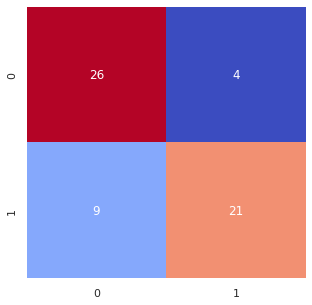

In [130]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [131]:
acc = metrics.accuracy_score(Ytest,preds)
acc

0.7833333333333333

In [132]:
indexes = np.random.randint(0,30,25)
indexes

array([23,  0, 16,  1, 21, 16, 10, 27, 22, 17, 14, 25, 29, 21, 13,  2, 29,
        2, 28,  2, 22, 22, 27,  3, 15])

#Testing the Model

In [133]:
testpath=list(paths.list_images(fp_s_w_train_healthy))
idxs=np.arange(0,len(testpath))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

for i in idxs:
    image=cv2.imread(testpath[i])
    output=image.copy()
    output=cv2.resize(output,(128,128))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(200,200))
    image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features= quantify_image(image)
    preds=model.predict([features])
    label=label_encoder.inverse_transform(preds)[0]
    color=(0, 255, 0) if label=="healthy" else (0, 0, 255)
    cv2.putText(output,label, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images.append(output)

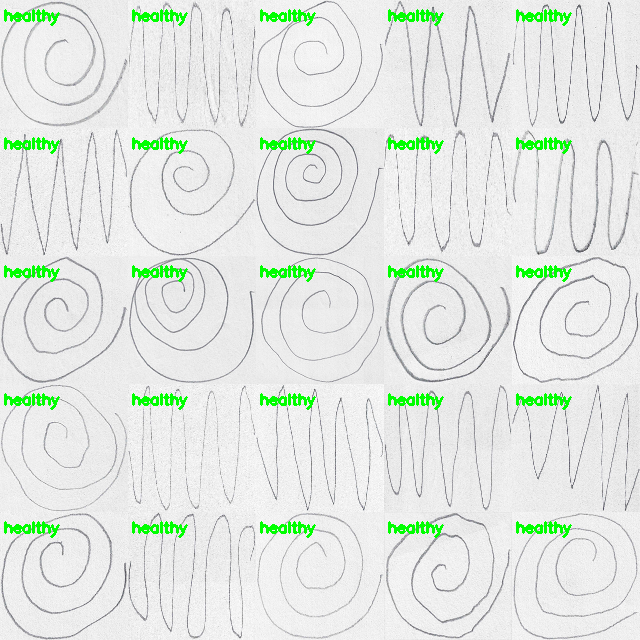

-1

In [134]:
'''montage = build_montages(images,(128,128),(5,5))[0]
cv2.imshow(montage)
cv2.waitKey(0)'''

montage=build_montages(images,(128, 128),(5, 5))[0]
cv2_imshow(montage)
cv2.waitKey(0)

##Predicting the model-Accuracy and Confusion Matrix

In [135]:
predictions = model.predict(Xtest)

cm = confusion_matrix(Ytest, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy = (tp + tn) / float(cm.sum())
print(accuracy)

[26  4  9 21]
0.7833333333333333


#Save the model

In [136]:
pickle.dump(model,open('parkinson.pkl','wb')) 